def sentiment_analysis( año : int ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.
Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}

In [1]:
import pandas as pd

archivo_csv1 = 'gamescompleto.csv'
archivo_csv2 = 'df_reviews_completo3sin23.csv'

dfgames = pd.read_csv(archivo_csv1)
dfreviews = pd.read_csv(archivo_csv2)


In [2]:
dfgames.head()
# año lanzamiento 0 release_date

,publisher,genres,item_name,title,url,release_date,tags,reviews_url,specs,price,early_access,item_id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [3]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28852 entries, 0 to 28851
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23936 non-null  object 
 1   genres        28852 non-null  object 
 2   item_name     28851 non-null  object 
 3   title         28851 non-null  object 
 4   url           28852 non-null  object 
 5   release_date  28834 non-null  object 
 6   tags          28828 non-null  object 
 7   reviews_url   28851 non-null  object 
 8   specs         28566 non-null  object 
 9   price         27622 non-null  object 
 10  early_access  28852 non-null  bool   
 11  item_id       28851 non-null  float64
 12  developer     28682 non-null  object 
dtypes: bool(1), float64(1), object(11)
memory usage: 2.7+ MB


In [4]:
dfgames.isnull().sum()

publisher       4916
genres             0
item_name          1
title              1
url                0
release_date      18
tags              24
reviews_url        1
specs            286
price           1230
early_access       0
item_id            1
developer        170
dtype: int64

In [5]:
dfgames2= dfgames[['release_date','item_id']]

In [6]:
dfgames2=dfgames2.dropna(subset=['release_date'])

In [7]:
dfgames2=dfgames2.dropna()

In [8]:
dfgames2.isnull().sum()

release_date    0
item_id         0
dtype: int64

In [9]:
dfgames2

,release_date,item_id
0,2018-01-04,761140.0
1,2018-01-04,643980.0
2,2017-07-24,670290.0
3,2017-12-07,767400.0
4,2018-01-04,772540.0
...,...,...
28847,2018-01-04,745400.0
28848,2018-01-04,773640.0
28849,2018-01-04,733530.0
28850,2018-01-04,610660.0


In [10]:
dfgames2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28833 entries, 0 to 28851
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  28833 non-null  object 
 1   item_id       28833 non-null  float64
dtypes: float64(1), object(1)
memory usage: 675.8+ KB


In [11]:
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59275 entries, 0 to 59274
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             25787 non-null  object 
 1   user_url            25787 non-null  object 
 2   funny               8150 non-null   object 
 3   Fecha_posteo        49159 non-null  float64
 4   last_edited         6140 non-null   object 
 5   item_id             59275 non-null  int64  
 6   helpful             59275 non-null  object 
 7   recommend           59275 non-null  bool   
 8   sentiment_analysis  59275 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 3.7+ MB


In [12]:
dfreviews2= dfreviews[['item_id','sentiment_analysis']]

In [13]:
dfreviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59275 entries, 0 to 59274
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   item_id             59275 non-null  int64
 1   sentiment_analysis  59275 non-null  int64
dtypes: int64(2)
memory usage: 926.3 KB


In [14]:
dfreviews2.isnull().sum()

item_id               0
sentiment_analysis    0
dtype: int64

In [15]:
df_merge = pd.merge(dfgames2, dfreviews2, on="item_id", how="inner")


In [16]:
df_merge

,release_date,item_id,sentiment_analysis
0,1997-06-30,282010.0,1
1,1998-11-08,70.0,1
2,1998-11-08,70.0,0
3,1998-11-08,70.0,0
4,1998-11-08,70.0,2
...,...,...,...
50358,2004-03-01,80.0,1
50359,2004-03-01,80.0,2
50360,2004-03-01,80.0,2
50361,2004-03-01,80.0,1


In [17]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50363 entries, 0 to 50362
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   release_date        50363 non-null  object 
 1   item_id             50363 non-null  float64
 2   sentiment_analysis  50363 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [18]:
# vamos a convetir la columna de fechas a datetime
df_merge['release_date'] = pd.to_datetime(df_merge['release_date'], format='%Y-%m-%d', errors='coerce')


In [19]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50363 entries, 0 to 50362
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        50138 non-null  datetime64[ns]
 1   item_id             50363 non-null  float64       
 2   sentiment_analysis  50363 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [20]:
df_merge=df_merge.dropna(subset=['release_date'])

In [21]:
df_merge.info()



<class 'pandas.core.frame.DataFrame'>
Index: 50138 entries, 0 to 50362
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        50138 non-null  datetime64[ns]
 1   item_id             50138 non-null  float64       
 2   sentiment_analysis  50138 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


In [22]:
df_merge['release_year'] = df_merge['release_date'].dt.year.astype(int)


C:\Users\W10\AppData\Local\Temp\ipykernel_12924\4112362021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['release_year'] = df_merge['release_date'].dt.year.astype(int)


C:\Users\W10\AppData\Local\Temp\ipykernel_12924\1907173146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['release_date'] = pd.to_datetime(df_merge['release_date'])


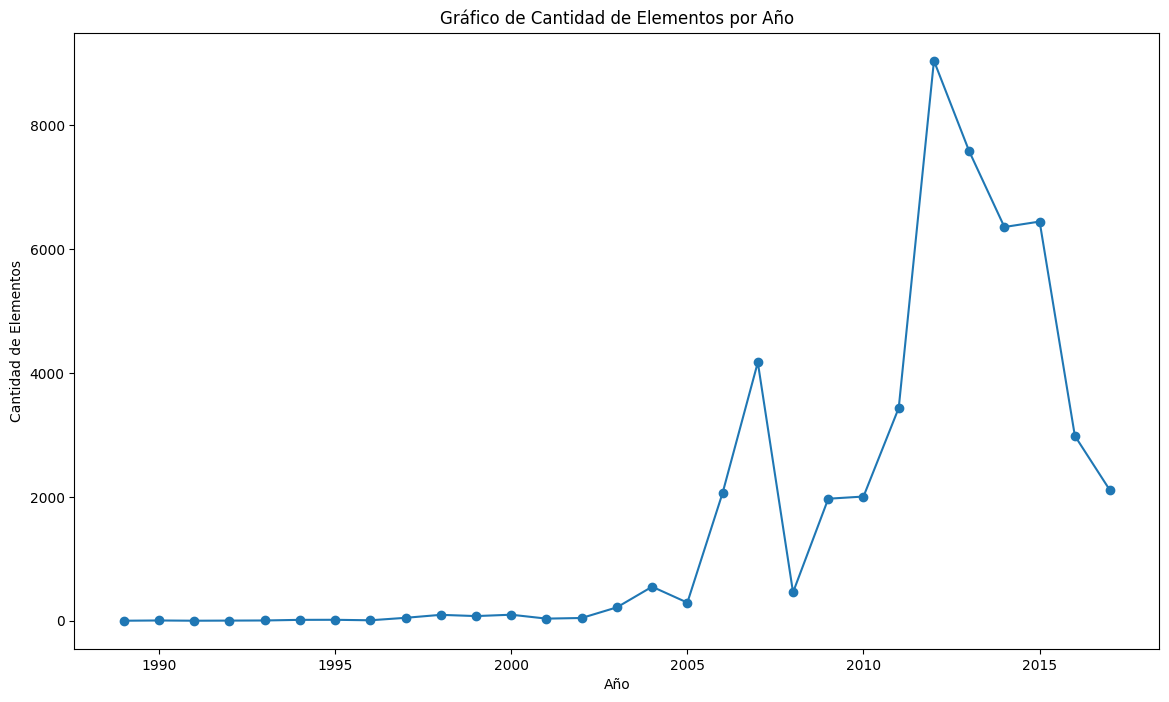

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_merge['release_date'] = pd.to_datetime(df_merge['release_date'])

# Agrupa y cuenta las filas por año
data_por_año = df_merge.groupby(df_merge['release_date'].dt.year).count()

plt.figure(figsize=(14, 8))  
plt.plot(data_por_año.index, data_por_año['item_id'], marker='o', linestyle='-')

plt.title('Gráfico de Cantidad de Elementos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Elementos')

plt.show()


In [25]:
valor_minimo = df_merge['release_date'].min()
valor_maximo = df_merge['release_date'].max()

print("mínimo:", valor_minimo)
print("máximo:", valor_maximo)

mínimo: 1989-01-01 00:00:00
máximo: 2017-12-25 00:00:00


In [30]:
archivo = 'df_5sinreduccion.parquet'
# exportamos el df a un archivo Parquet.
df_merge.to_parquet(archivo, index=False)

In [27]:
import pandas as pd 


In [32]:
df5 = pd.read_parquet('df_5sinreduccion.parquet')

In [33]:
df5.head()

,release_date,item_id,sentiment_analysis,release_year
0,1997-06-30,282010.0,1,1997
1,1998-11-08,70.0,1,1998
2,1998-11-08,70.0,0,1998
3,1998-11-08,70.0,0,1998
4,1998-11-08,70.0,2,1998


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50138 entries, 0 to 50137
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        50138 non-null  datetime64[ns]
 1   item_id             50138 non-null  float64       
 2   sentiment_analysis  50138 non-null  int64         
 3   release_year        50138 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 1.3 MB


In [35]:
def sentiment_analysis(año:int):
    # Filtra el DataFrame para el año especificado
    df_filtrado = df5[df5['release_year'] == año]

    # Cuenta la cantidad de registros para cada categoría de sentimiento
    conteo_sentimiento = df_filtrado['sentiment_analysis'].value_counts()

    # Construye el diccionario de retorno con las categorías de sentimiento y sus cantidades
    resultado = {
        "Negative": conteo_sentimiento.get(0, 0),
        "Neutral": conteo_sentimiento.get(1, 0),
        "Positive": conteo_sentimiento.get(2, 0)
    }

    return resultado

In [36]:
resultado = sentiment_analysis(2004)
print(resultado)


{'Negative': 76, 'Neutral': 188, 'Positive': 286}


In [37]:
# Lista para almacenar los resultados por año
resultados_por_año = []

# Itera desde el año 2010 hasta el 2015
for año in range(1985, 2023):
    # Llama a la función UsersRecommend para el año actual
    resultado_poraño = sentiment_analysis(año)

    # Agrega el resultado a la lista de resultados por año
    resultados_por_año.append({str(año): resultado_poraño})

# Imprime los resultados
for resultado in resultados_por_año:
    print(resultado)

{'1985': {'Negative': 0, 'Neutral': 0, 'Positive': 0}}
{'1986': {'Negative': 0, 'Neutral': 0, 'Positive': 0}}
{'1987': {'Negative': 0, 'Neutral': 0, 'Positive': 0}}
{'1988': {'Negative': 0, 'Neutral': 0, 'Positive': 0}}
{'1989': {'Negative': 0, 'Neutral': 0, 'Positive': 1}}
{'1990': {'Negative': 1, 'Neutral': 0, 'Positive': 4}}
{'1991': {'Negative': 0, 'Neutral': 0, 'Positive': 1}}
{'1992': {'Negative': 0, 'Neutral': 1, 'Positive': 2}}
{'1993': {'Negative': 2, 'Neutral': 1, 'Positive': 2}}
{'1994': {'Negative': 2, 'Neutral': 5, 'Positive': 8}}
{'1995': {'Negative': 3, 'Neutral': 4, 'Positive': 9}}
{'1996': {'Negative': 2, 'Neutral': 4, 'Positive': 2}}
{'1997': {'Negative': 5, 'Neutral': 15, 'Positive': 28}}
{'1998': {'Negative': 17, 'Neutral': 28, 'Positive': 51}}
{'1999': {'Negative': 10, 'Neutral': 34, 'Positive': 32}}
{'2000': {'Negative': 16, 'Neutral': 39, 'Positive': 43}}
{'2001': {'Negative': 7, 'Neutral': 10, 'Positive': 18}}
{'2002': {'Negative': 8, 'Neutral': 11, 'Positive': 